In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func

# Set matplotlib style to 'fivethirtyeight'
from matplotlib import style
style.use('fivethirtyeight')

# Connect to the SQLite Database
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

# Reflect Tables into Classes
Base = automap_base()
Base.prepare(engine)

# Reflect the tables individually with autoload_with=engine
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a Session
session = Session(engine)

# Close the session
session.close()


In [2]:
# Get the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Convert the most recent date to a datetime object
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')

# Calculate the start date for the previous 12 months
start_date = most_recent_date - dt.timedelta(days=365)


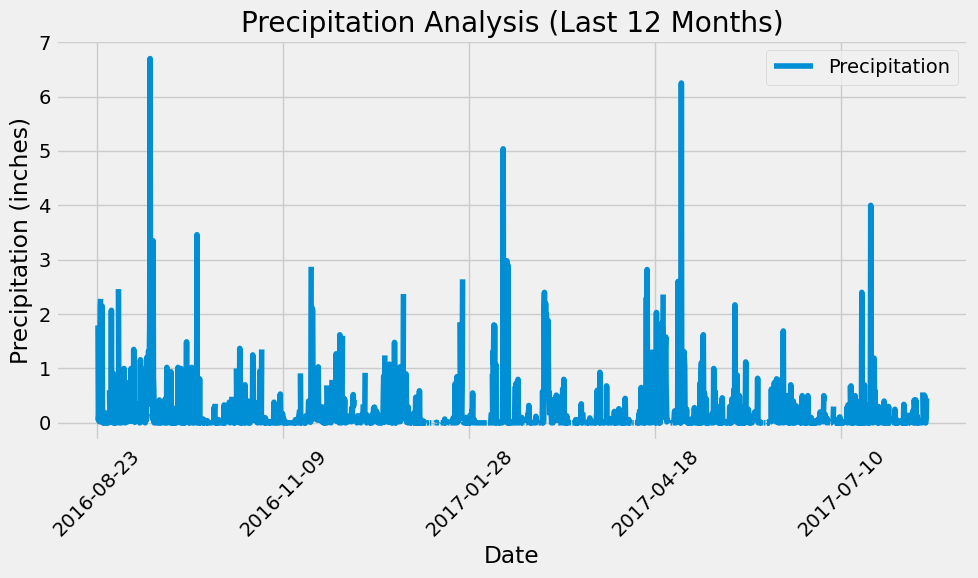


Summary Statistics for Precipitation Data:
       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [3]:
# Convert start_date to string
start_date_str = start_date.strftime('%Y-%m-%d')

# Query the database for precipitation data within the previous 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date_str).all()

# Load the query results into a Pandas DataFrame and set column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the DataFrame values by "date"
precipitation_df = precipitation_df.sort_values(by='Date')

# Plot the results
precipitation_df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Analysis (Last 12 Months)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the summary statistics for the precipitation data
print("\nSummary Statistics for Precipitation Data:")
print(precipitation_df.describe())


In [4]:
# Design a query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Design a query to find the most-active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

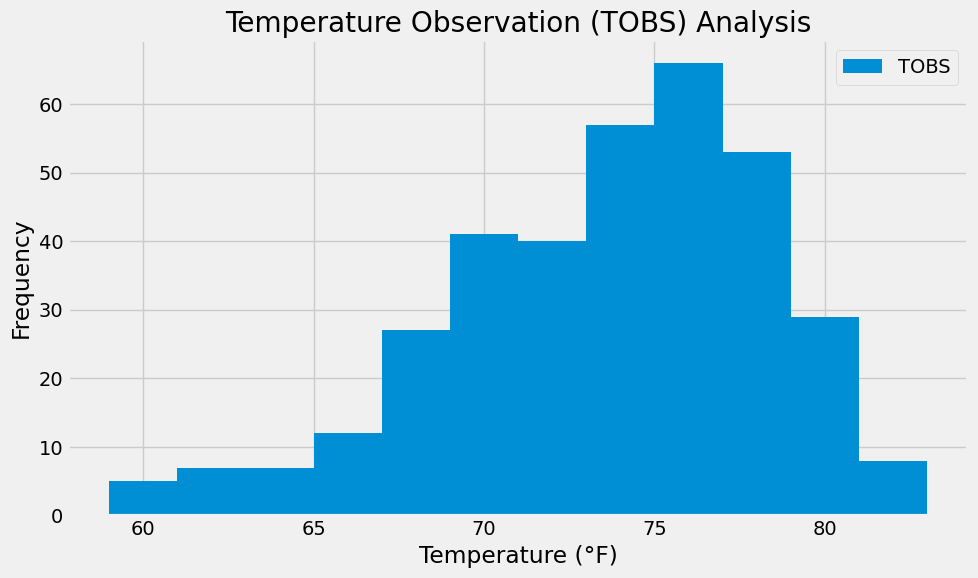

In [5]:
# Extract the station ID with the greatest number of observations
most_active_station_id = most_active_stations[0][0]

# Design a query to calculate the lowest, highest, and average temperatures for the most-active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

# Design a query to get the previous 12 months of temperature observation (TOBS) data for the most-active station
tobs_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= start_date_str).all()

# Plot the TOBS data as a histogram
tobs_df = pd.DataFrame(tobs_data, columns=['Date', 'TOBS'])
tobs_df.plot.hist(bins=12, figsize=(10, 6))
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observation (TOBS) Analysis")
plt.tight_layout()
plt.show()

In [6]:
# Close the session
session.close()

In [7]:
from sqlalchemy import create_engine, text

# Define the path to the SQLite database file
db_path = 'Resources/hawaii.sqlite'

# Create engine to connect to SQLite database
engine = create_engine(f'sqlite:///{db_path}')

# Test the database connection
try:
    # Establish a connection
    connection = engine.connect()
    
    # Execute a test query
    result = connection.execute(text('SELECT 1'))
    
    # Fetch and print the result
    print(result.fetchone())
    
    # Close the connection
    connection.close()
    
    print("Database connection successful!")
except Exception as e:
    print("Error connecting to the database:", e)


(1,)
Database connection successful!
